In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif

df=pd.read_csv("/kaggle/input/favorite-music-dataset/favorite_music_dataset.csv")
df


,Song_Title,Artist,Genre,Release_Year,Duration_Minutes,Listened_Date,Platform
0,Faded,Alan Walker,Electronic,2024,4.02,2024-02-10,Apple Music
1,Blinding Lights,The Weeknd,Synth-pop,2018,4.45,2024-05-30,Zing MP3
2,Faded,Alan Walker,Electronic,2024,4.86,2024-05-07,Zing MP3
3,Faded,Alan Walker,Electronic,2012,4.92,2024-03-19,YouTube
4,Bohemian Rhapsody,Queen,Rock,2023,3.90,2024-01-16,Apple Music
...,...,...,...,...,...,...,...
95,Counting Stars,OneRepublic,Pop Rock,2013,3.40,2024-05-30,Spotify
96,Senorita,Shawn Mendes & Camila Cabello,Latin Pop,2024,2.75,2024-06-11,Apple Music
97,Counting Stars,OneRepublic,Pop Rock,2010,3.57,2024-01-03,Zing MP3
98,Blinding Lights,The Weeknd,Synth-pop,2012,4.04,2024-06-13,Apple Music


In [2]:
df.shape

(100, 7)

In [3]:
df.ndim

2

In [4]:
df.size

700

In [5]:
df.columns

Index(['Song_Title', 'Artist', 'Genre', 'Release_Year', 'Duration_Minutes',
       'Listened_Date', 'Platform'],
      dtype='object')

In [6]:
[col for col in df.columns if df[col].isnull().sum() > 0]

[]

In [7]:
pop_music = df[df['Genre'] == 'Pop']
pop_music.head(5)

,Song_Title,Artist,Genre,Release_Year,Duration_Minutes,Listened_Date,Platform
11,Photograph,Ed Sheeran,Pop,2014,4.24,2024-03-24,Apple Music
13,Levitating,Dua Lipa,Pop,2023,3.25,2024-01-20,Spotify
15,Photograph,Ed Sheeran,Pop,2013,4.79,2024-02-20,Spotify
21,Photograph,Ed Sheeran,Pop,2021,3.34,2024-05-17,Zing MP3
23,Stay,The Kid LAROI & Justin Bieber,Pop,2020,3.49,2024-03-09,Apple Music


In [8]:
target = 'Genre' 

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (80, 6)
Test shape: (20, 6)


In [9]:
constant_features = [col for col in X_train.columns if X_train[col].nunique() == 1]
print("Constant Features:", constant_features)

X_train = X_train.drop(columns=constant_features)
X_test = X_test.drop(columns=constant_features)


Constant Features: []


In [10]:
quasi_constant = []
for col in X_train.columns:
    top_freq = X_train[col].value_counts(normalize=True).max()
    if top_freq > 0.99:
        quasi_constant.append(col)

print("Quasi-Constant Features:", quasi_constant)

X_train = X_train.drop(columns=quasi_constant)
X_test = X_test.drop(columns=quasi_constant)


Quasi-Constant Features: []


In [11]:
dup_features = X_train.T[X_train.T.duplicated()].index.tolist()
print("Duplicate Features:", dup_features)

X_train = X_train.drop(columns=dup_features)
X_test = X_test.drop(columns=dup_features)


Duplicate Features: []


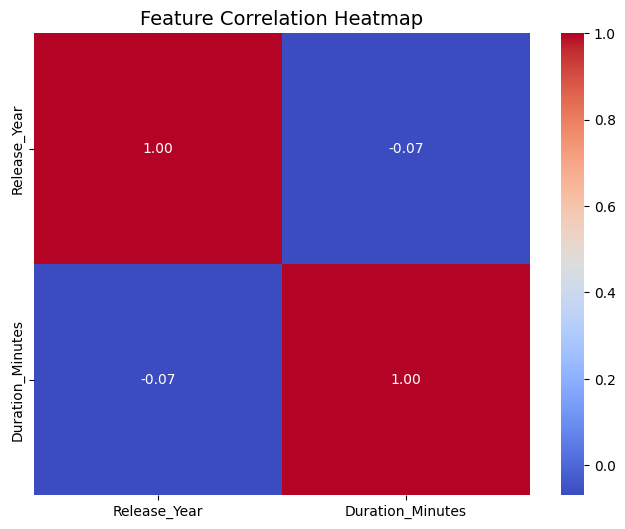

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


corr_matrix = X_train.select_dtypes(include=[np.number]).corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


In [13]:

X_train_enc = pd.get_dummies(X_train.fillna(0))
X_test_enc = pd.get_dummies(X_test.fillna(0))

X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)

mi_scores = mutual_info_classif(X_train_enc, y_train, discrete_features='auto')
mi_series = pd.Series(mi_scores, index=X_train_enc.columns).sort_values(ascending=False)

print("Top 10 Features by Mutual Information:\n", mi_series.head(10))


Top 10 Features by Mutual Information:
 Song_Title_Blinding Lights    0.632211
Artist_Alan Walker            0.500741
Artist_The Weeknd             0.391109
Artist_Ed Sheeran             0.375955
Song_Title_Perfect            0.314087
Song_Title_Faded              0.308964
Artist_Passenger              0.299330
Song_Title_Dance Monkey       0.296791
Artist_Billie Eilish          0.287570
Song_Title_Peaches            0.284021
dtype: float64
